# Lab 1

Qiskit is the package that we will use for simulations of quantum circuits.



In [1]:
# We need to import the following modules for this example.
import qiskit
# Aer is a high performance simulator framework for quantum circuits that includes noise models.
from qiskit_aer import Aer
# QuantumCircuit is a class for representing the quantum circuits.
from qiskit import QuantumCircuit
# QuantumRegister and ClassicalRegister are classes for representing the registers.
from qiskit import QuantumRegister, ClassicalRegister, transpile

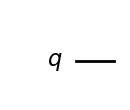

In [2]:
# Create a quantum circuit with 1 qubit
circuit = QuantumCircuit(1)

# Draw the circuit
circuit.draw(output='mpl')

We can also print the circuit directly.

In [3]:
# Print the circuit
print(circuit)

   
q: 
   


Observe that we have created a quantum circuit with 1 qubit $\ket{q}=a\ket{0}+b\ket{1}$.

The qubit is initialized in the state $\ket{0}$ so, in our case, initially $a=1$ and $b=0$.

The ciruit is empty, we can add gates to it.

For example let's put the qubit in superposition using the Hadamard gate.



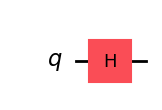

In [4]:
# Apply Hadamard gate to the qubit
circuit.h(0)

# Draw the circuit
circuit.draw(output='mpl')

The Hadamard gate puts the qubit in superposition so

$$\ket{q}=\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} $$

If we measure, this qubit will have a 0.5 probability to collaps in state 0 and 0.5 to fall in state 1.

Let's add a mesurement.

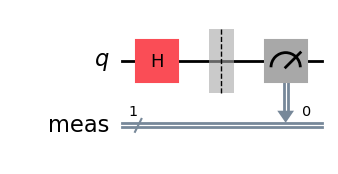

In [5]:
# Measure the qubit
circuit.measure_all()

# Draw the circuit
circuit.draw(output='mpl')

Qiskit is packaged to contain all four elements: *Terra*, *Aer*, *Ignis*, and *Aqua* (earth, air, fire, and water, respectively), which together make up the universe of quantum programming.

1. *Terra* is the base library upon which all the other elements of Qiskit are built. Terra allows a developer to code the base of an algorithm to the specific operator on a qubit.
2. *Aer* is a high-performance framework that you will use to simulate your circuits on various optimized simulator backends. 
3. *Ignis* will help you learn about the various errors that currently affect experiments on read devices, such as relaxation and decoherence, so you can design quantum error correction codes.
4. *Aqua* will, in essence, pull everything together.


Now, since we created a simple circuit let's make a simulation to see how it works. For this we use the Aer class from qiskit module. 

- The Qasm simulator, which executes a quantum circuit with multiple shots to simulate a noisy backend quantum system
- The statevector simulator, which provides the state vector of the quantum circuit
- The unitary simulator, which provides the unitary matrix of the quantum circuit being executed
- The pulse simulator, which simulates pulse schedules to execute directly to the various channels on the hardware

We begin using the statevector simulator.

In [6]:
# Simulate the circuit using the statevector simulator
simulator = Aer.get_backend('statevector_simulator')
transpiled_circuit = transpile(circuit, backend=simulator)
job = simulator.run(transpiled_circuit, shots=10000)
result = job.result()
statevector = result.get_statevector()
print(statevector)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Observe that we obtain at each run of the statevector simulation a random state between 

$$\begin{pmatrix}1.+0.j \\ 0.+0.j\end{pmatrix} \text{and} \begin{pmatrix}0.+0.j \\ 1.+0.j\end{pmatrix}$$.

Try and run the above code several times and look at the results.


We can use also the QASM simulator:

{'0': 4989, '1': 5011}


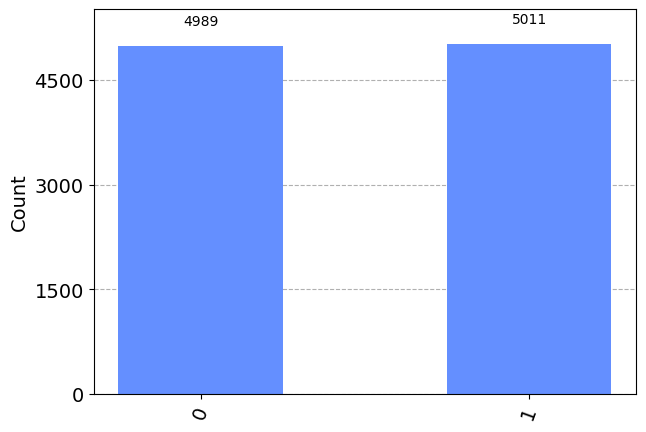

In [7]:
# Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, backend=simulator)
job = simulator.run(transpiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)

# Plot the histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We observe that we can use this simple circuit to create a random bit.

Let us play a game of dice.

## Exercise 1
 Create a function that simulates a fair dice using hadamard gates and measurements.


In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def simulate_dice_roll():
    correct = False
    while not correct:
        # Create a quantum circuit with 3 qubits
        circuit = QuantumCircuit(3, 3)
    
        # Apply Hadamard gate to all qubits
        circuit.h(range(3))
    
        # Measure all qubits
        circuit.measure(range(3), range(3))
    
        # Simulate the circuit using the qasm simulator
        simulator = Aer.get_backend('qasm_simulator')
        transpiled_circuit = transpile(circuit, backend=simulator)
        job = simulator.run(transpiled_circuit, shots=1)
        result = job.result()
        counts = result.get_counts()
        print (counts.keys())
        output = int(list(counts.keys())[0], 2)
        correct = output > 0 and output < 7
    return output

# Test the function
dice_roll = simulate_dice_roll()
print("Dice roll:", dice_roll)

dict_keys(['110'])
Dice roll: 6


Another usefull gate is the rx gate. 

rx(theta, qubit, label=None)

Parameters

theta (ParameterValueType) – The rotation angle of the gate.

qubit (QubitSpecifier) – The qubit(s) to apply the gate to.

label (str(opens in a new tab) | None) – The string label of the gate in the circuit.

Returns

A handle to the instructions created.

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit with 1 qubit
circuit = QuantumCircuit(1)

# Apply Rx gate to the qubit
circuit.rx(0.75, 0)

# Simulate the circuit using the statevector simulator
simulator = Aer.get_backend('statevector_simulator')
transpiled_circuit = transpile(circuit, backend=simulator)
job = simulator.run(transpiled_circuit)
result = job.result()
statevector = result.get_statevector()

# Plot the Bloch vector of the qubit
plot_bloch_multivector(statevector)
print(statevector)

Statevector([0.93050762+0.j        , 0.        -0.36627253j],
            dims=(2,))


With this gate we can apply a rotation $R_x(\theta)$ to the qubit with the angle $\theta$ (in radians) around the Ox axis.

There are similar gates for all the other axis: ry for Oy and rz for Oz. 

This will change the values a and b.

Let $\ket{\Psi}=1\cdot\ket{0}+0\cdot\ket{1}$ we apply the gate rx(0.75, $\ket{\Psi}$) and we obtain: 

$R_x(\theta)=\begin{pmatrix}  cos(\theta / 2) & -i sin(\theta/2) \\  -i sin(\theta/2) & cos(\theta / 2)   \end{pmatrix}$

$R_x(0.75) = \begin{pmatrix}  0.9305 & -i \cdot 0.3662 \\  -i \cdot 0.3662 & 0.9305   \end{pmatrix}$

We apply $R_x(0.75)$ to qubit $\ket{\Psi}$:

$ \begin{pmatrix}  0.9305 & -i \cdot 0.3662 \\  -i \cdot 0.3662 & 0.9305   \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

We get $(0.9305+i\cdot 0.0)\ket{0}+(0.0-i\cdot 0.3662)\ket{1}  $.

If we measure this qubit we get 0 with the probability 0.8658 and 1 with the probability 0.1242. 

In [10]:
# Add a measurement to the qubit
circuit.measure_all()

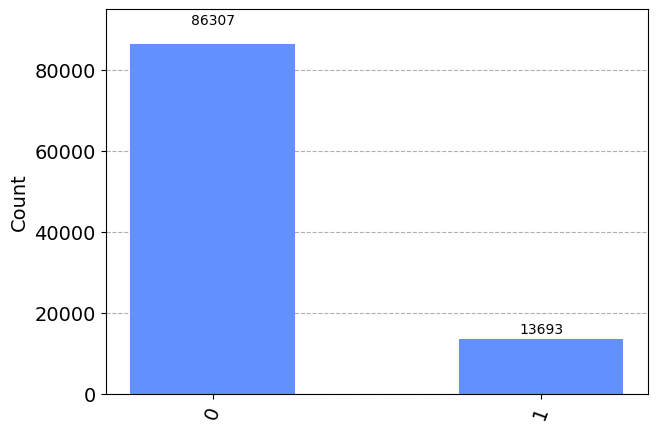

In [11]:
# Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, backend=simulator)
job = simulator.run(transpiled_circuit, shots=100000)
result = job.result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

## Exercise 2

Simulate rolling a rigged dice in a function that receives two parameters: the desired output and the probability to get it.

To achive this, amplify the chance to get the desired face. Use for this a rotation gate on the x axis.


0.8879040017426006
0.9422865815358938
0.6828016625490974


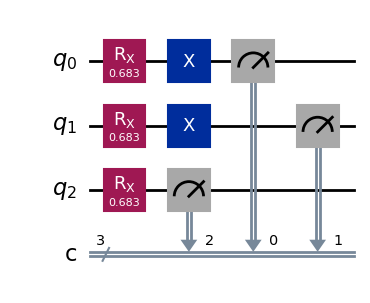

In [12]:
import math
x = 0.7**(1/3)
print(x)
a=x**(1/2)
print(a)
theta = 2*math.acos(a)
print(theta)

c = QuantumCircuit(3,3)
c.rx(theta, 0)
c.rx(theta, 1)
c.rx(theta, 2)
c.x(0)
c.x(1)

c.measure(range(3), range(3))
c.draw(output='mpl', style='iqp')

{'1': 1310, '0': 8690}


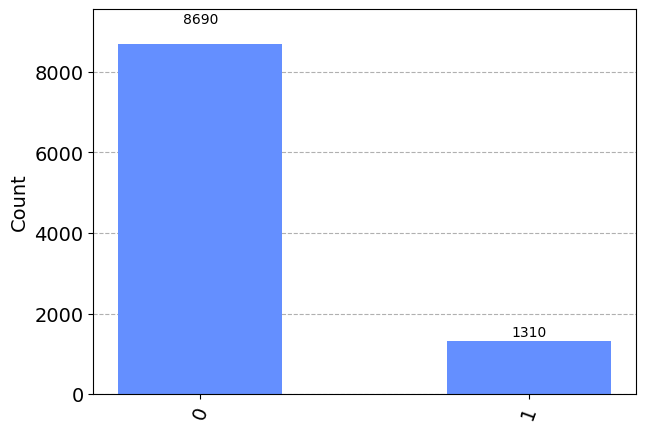

In [13]:
# Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, backend=simulator)
job = simulator.run(transpiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)

# Plot the histogram
plot_histogram(counts)

In [14]:
c1=QuantumCircuit(6,6)

In [15]:
def binar(n):
    binary_string = bin(n)[2:]  # Get the binary string representation of n without the '0b' prefix
    bits = [int(bit) for bit in binary_string]  # Convert the binary string into a list of bits
    return bits

print(binar(6))

[1, 1, 0]


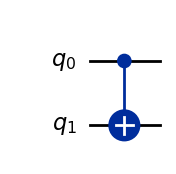

In [16]:
# Create a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Apply CNOT gate with qubit 0 as the control qubit and qubit 1 as the target qubit
circuit.cx(0, 1)

# Draw the circuit
circuit.draw(output='mpl')